In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, train_test_split, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import re
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import time
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
train = pd.read_json('https://gitlab.com/abpaudel/cuisine/raw/master/cook_train.json')
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
train.iloc[0].ingredients

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Text(0, 0.5, 'Count')

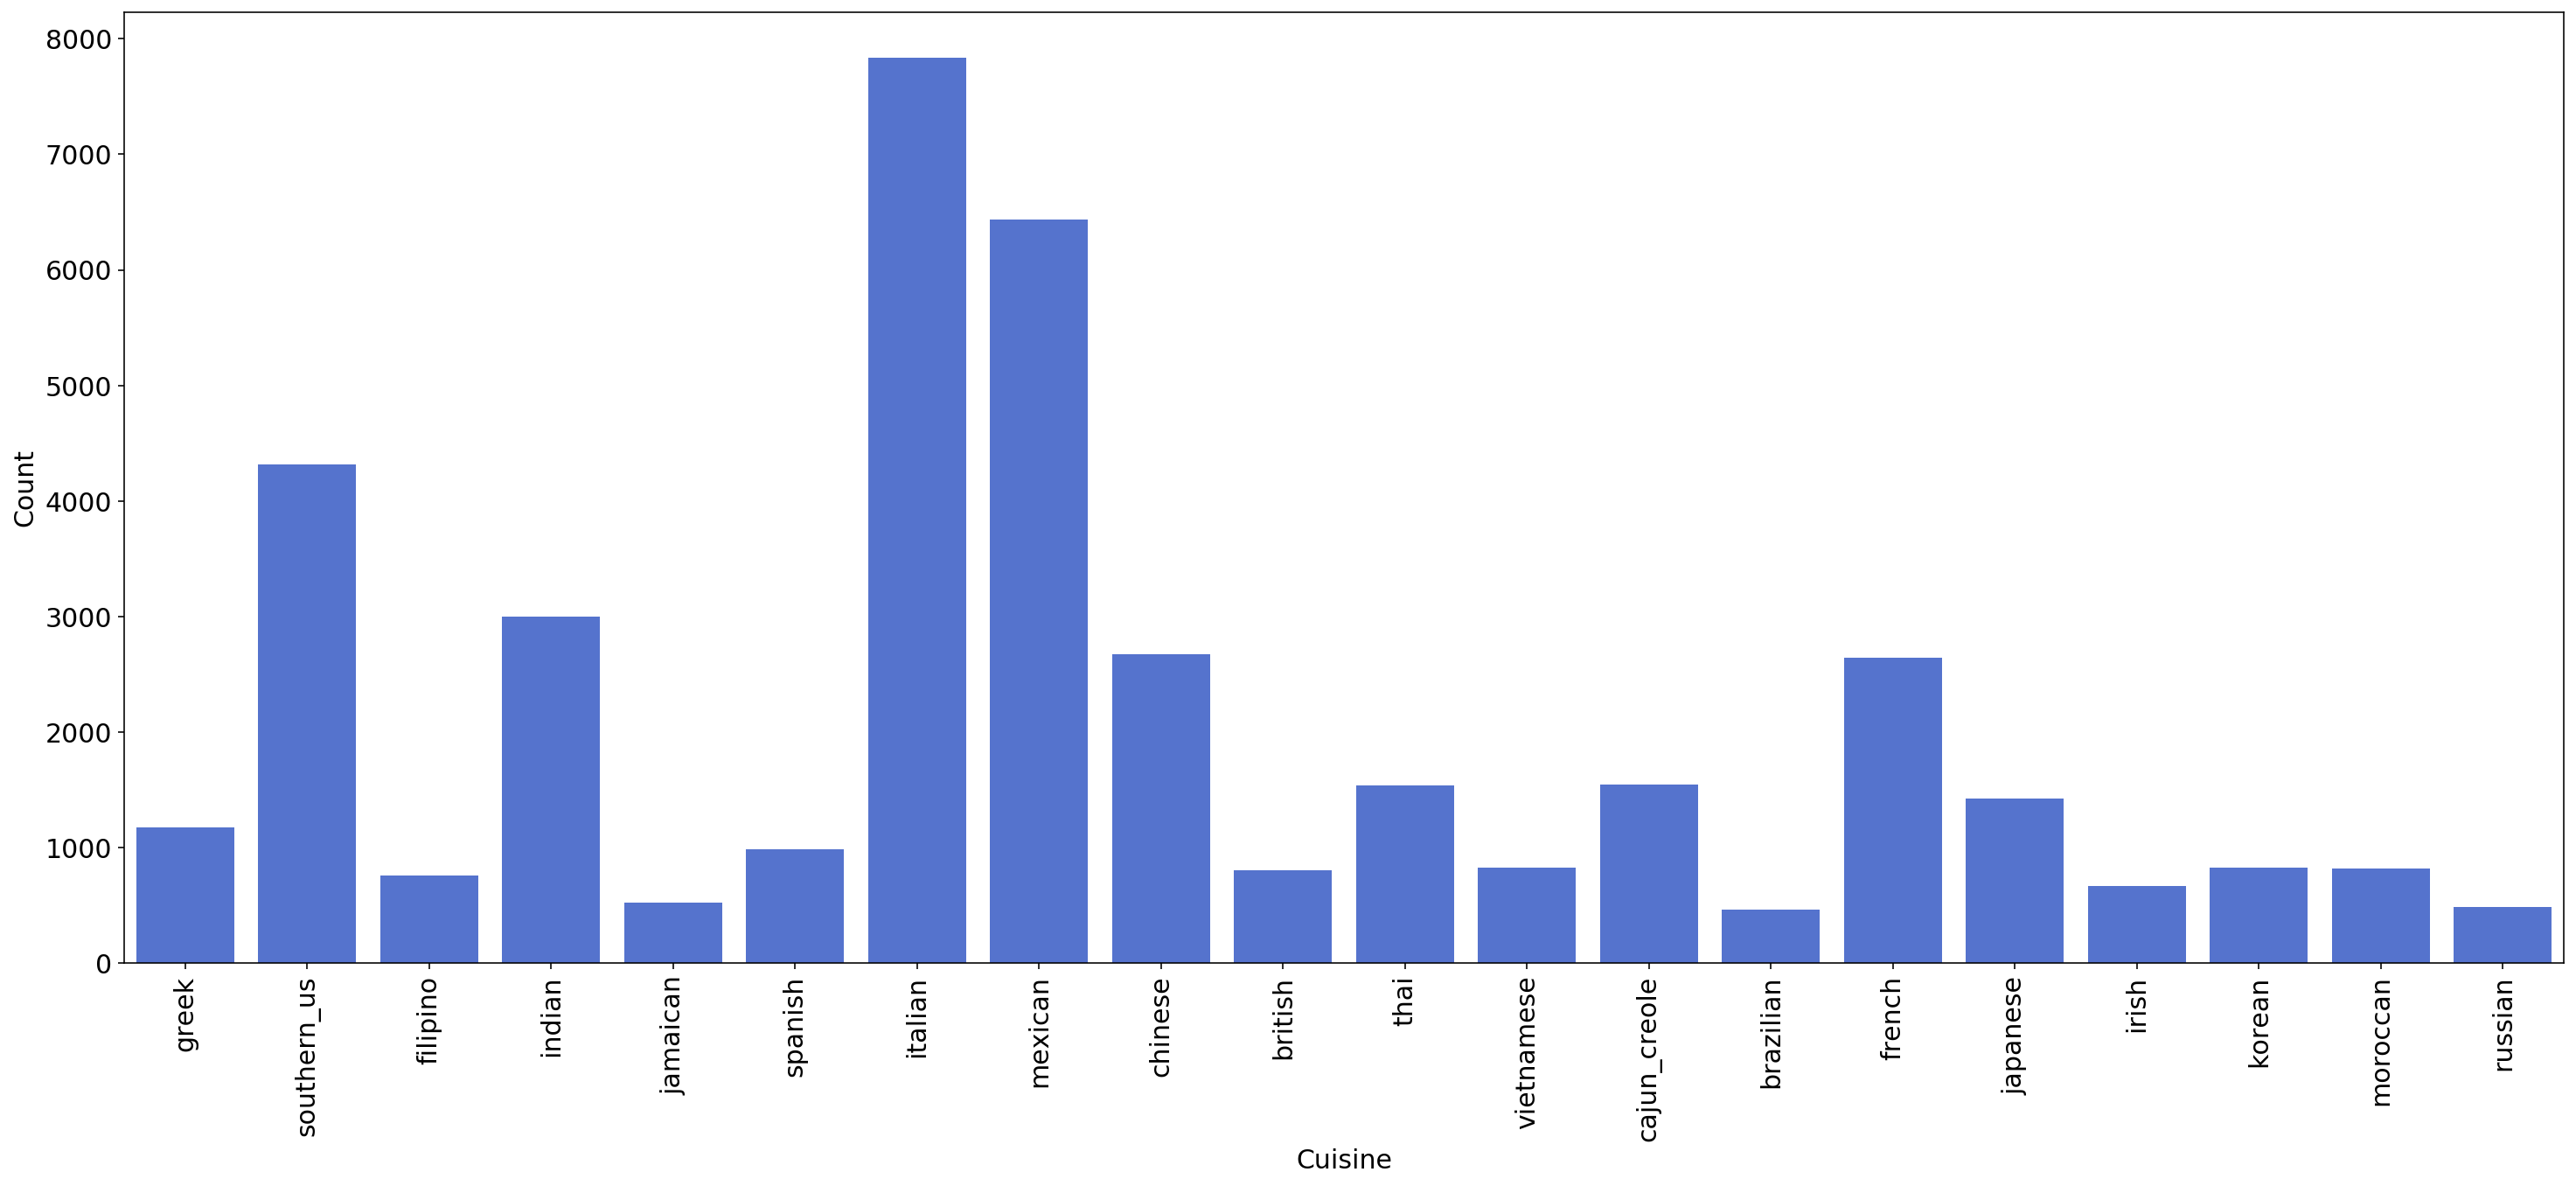

In [5]:
plt.figure(figsize=(25,10))
f = sns.countplot(train.cuisine, color='royalblue')
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.tick_params(labelsize=15)
f.set_xlabel('Cuisine', fontsize=15)
f.set_ylabel('Count', fontsize=15)


In [0]:
# plt.figure(figsize=(15,10))
# train.cuisine.value_counts().plot.pie(autopct='%1.2f%%')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
id             39774 non-null int64
cuisine        39774 non-null object
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [8]:
train.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [0]:
def preprocess(ingr):
    ingr_text = ' '.join(ingr)
    ingr_text = ingr_text.lower()
    ingr_text = ingr_text.replace('-', ' ')
    words = []
    for word in ingr_text.split():
        word = re.sub('[^a-zA-Z -]+', '', word)
        words.append(word.lower().strip(",.!:?;' "))
    return ' '.join(words)

In [11]:
train['ingredients_str'] = train.ingredients.apply(preprocess)
train.head()

,id,cuisine,ingredients,ingredients_str
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [0]:
tfidf = TfidfVectorizer(max_features=2900)


In [0]:
# countvec = CountVectorizer(max_features=2900)
# X = countvec.fit_transform(train.ingredients_str)
# y = train.cuisine
# X.shape

In [14]:
X = tfidf.fit_transform(train.ingredients_str)
y = train.cuisine
X.shape

(39774, 2900)

In [0]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)

In [16]:
run = RandomUnderSampler(random_state=0)
Xun, yun = run.fit_resample(X,y)
Xun.shape,yun.shape

((9340, 2900), (9340,))

In [0]:
rov = RandomOverSampler(random_state=0)
Xov, yov = rov.fit_resample(X,y)

In [0]:
Xun_pca = KernelPCA(n_components=500, kernel='linear').fit_transform(Xun)

In [0]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=0)
# kfold = KFold(n_splits=5, random_state=0)

In [0]:
# model = MultinomialNB(alpha=0.01)
# model.fit(Xtrain, ytrain)
# model.score(Xtrain, ytrain)

In [0]:
# model.score(Xtest,ytest)

In [0]:
# model = MultinomialNB()
# param_grid = {'alpha':[0.01]}
# grid = GridSearchCV(model, param_grid, cv=5)
# grid.fit(X, y)
# grid.best_params_

In [0]:
# bayes = grid.best_estimator_
# print('Train accuracy: {}'.format(bayes.score(Xtrain, ytrain)))
# print('Test accuracy: {}'.format(bayes.score(Xtest, ytest)))

In [0]:
# model = bayes
# y_pred = model.predict(Xtest)
# prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
# prf = prf.drop('support', axis=0).drop(['accuracy', 'weighted avg'], axis=1).iloc[[1,2,0]]
# plt.figure(figsize=(21,3))
# sns.heatmap(prf, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
# plt.xticks(fontsize=18, rotation=90)
# plt.yticks(fontsize=18, rotation=0)
# plt.show()
# plt.figure(figsize=(10,10))
# sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.show()

In [0]:
# model = SVC(C=1, gamma=1)
# # param_grid = {'tfidf__ngram_range':[(1,1)],'clf__C':[10], 'clf__gamma': [1]}

# # grid = GridSearchCV(pipeline, param_grid, cv=5)

# # grid.fit(Xtrain, ytrain)
# # grid.score(Xtest, ytest)


# model.fit(Xun_pca, ytrain)

In [0]:
# svm = model
# print('Train accuracy: {}'.format(svm.score(Xun_pca, ytrain)))
# print('Test accuracy: {}'.format(svm.score(Xtest, ytest)))

In [0]:
# model=svm
# y_pred = model.predict(Xtest)
# prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
# prf = prf.drop('support', axis=0).drop(['accuracy','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
# plt.figure(figsize=(21,3))
# sns.heatmap(prf, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
# plt.xticks(fontsize=18, rotation=90)
# plt.yticks(fontsize=18, rotation=0)
# plt.show()
# plt.figure(figsize=(10,10))
# sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

def nn_model(input_dim):
  nn = Sequential()
  nn.add(Dense(50, input_dim=input_dim, activation='relu'))
  nn.add(Dense(50, activation='relu'))
  nn.add(Dense(20, activation='softmax'))
  nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return nn
# model = KerasClassifier(build_fn=nn_model, input_dim=500,epochs=10, batch_size=32, verbose=1)

# grid = GridSearchCV(pipeline, param_grid, cv=5)
# model.fit(Xtrain, ytrain)

In [0]:
# neural = model#grid.best_estimator_
# print('Train accuracy: {}'.format(neural.score(Xtrain, ytrain)))
# print('Test accuracy: {}'.format(neural.score(Xtest, ytest)))

In [0]:
# model=neural
# y_pred = model.predict(Xtest)
# prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
# prf = prf.drop('support', axis=0).drop(['accuracy','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
# plt.figure(figsize=(21,3))
# sns.heatmap(prf, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
# plt.xticks(fontsize=18, rotation=90)
# plt.yticks(fontsize=18, rotation=0)
# plt.show()
# plt.figure(figsize=(10,10))
# sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.show()

In [0]:
np.random.seed(1)
# trained_models = []
# prf = []
dataset_list = [('Original Dataset',X,y),
                ('Oversampled Dataset',Xov,yov),
                ('Undersampled Dataset',Xun,yun),
                ('Undersampled Dataset with PCA',Xun_pca,yun)]

for dataset,Xtrain,ytrain in dataset_list:
  print('-------------------------------------------------------------------------------------')
  print('Dataset:',dataset)
  print('-------------------------------------------------------------------------------------')
  # models = []
  if dataset=='Undersampled Dataset with PCA':
    input_dim=500
    # Xtest = KernelPCA(n_components=500, kernel='linear').fit_transform(Xtest)
  else:
    input_dim=2900
  model_list = [('Naive Bayes',MultinomialNB(alpha=0.001)),
              ('SVM',SVC(C=1, gamma=1)),
              ('Neural Network',KerasClassifier(build_fn=nn_model,input_dim=input_dim, epochs=10, batch_size=32, verbose=1))]
  for name, model in model_list:
    print('..............................')
    print('Classifier:',name)
    print('..............................')
    if dataset=='Undersampled Dataset with PCA' and name=='Naive Bayes':
      continue
    starttime = time.monotonic()
    # model.fit(Xtrain,ytrain)
    cv = StratifiedKFold(n_splits=5)
    # model.fit(Xtrain,ytrain)
    # model.score(Xtrain,ytrain)
    scores = cross_validate(model, Xtrain, ytrain, cv=cv, return_train_score=True)
    print('Training time:',(time.monotonic()-starttime)/60, ' minutes')
    print(scores)
    print('Train accuracy: {}\nMean: {}'.format(scores['train_score'],scores['train_score'].mean()))
    print('Test accuracy: {}\nMean: {}'.format(scores['test_score'],scores['test_score'].mean()))
    # if dataset=='Original Dataset':
    #   y_pred = model.predict(Xtest)
    #   report=classification_report(ytest, y_pred, output_dict=True)
    #   prf.append(report)
    # models.append(model)
  # trained_models.append(models)



-------------------------------------------------------------------------------------
Dataset: Original Dataset
-------------------------------------------------------------------------------------
..............................
Classifier: Naive Bayes
..............................
Training time: 0.022026702566669578  minutes
{'fit_time': array([0.15095282, 0.14740777, 0.14518213, 0.15000963, 0.14775753]), 'score_time': array([0.01181483, 0.01126742, 0.01083422, 0.01148224, 0.01120949]), 'test_score': array([0.72695303, 0.7379995 , 0.72649573, 0.7298453 , 0.72933182]), 'train_score': array([0.78866465, 0.78526528, 0.78685021, 0.79081168, 0.78785308])}
Train accuracy: [0.78866465 0.78526528 0.78685021 0.79081168 0.78785308]
Mean: 0.7878889797119106
Test accuracy: [0.72695303 0.7379995  0.72649573 0.7298453  0.72933182]
Mean: 0.7301250753083551
..............................
Classifier: SVM
..............................
Training time: 27.442462432350005  minutes
{'fit_time': array([153

In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import pickle

In [0]:
with open('/drive/My Drive/trained_models.pkl', 'wb') as f:
     pickle.dump(trained_models, f)

In [0]:
with open('/drive/My Drive/prf.pkl', 'wb') as f:
     pickle.dump(prf, f)

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8,5))
    # plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation Accuracy")

    plt.legend(loc="best")
    return plt


In [0]:
model_list = [('Naive Bayes',MultinomialNB(alpha=0.001)),
              ('SVM',SVC(C=1, gamma=1)),
              ('Neural Network',KerasClassifier(build_fn=nn_model,input_dim=2900, epochs=10, batch_size=32, verbose=1))]

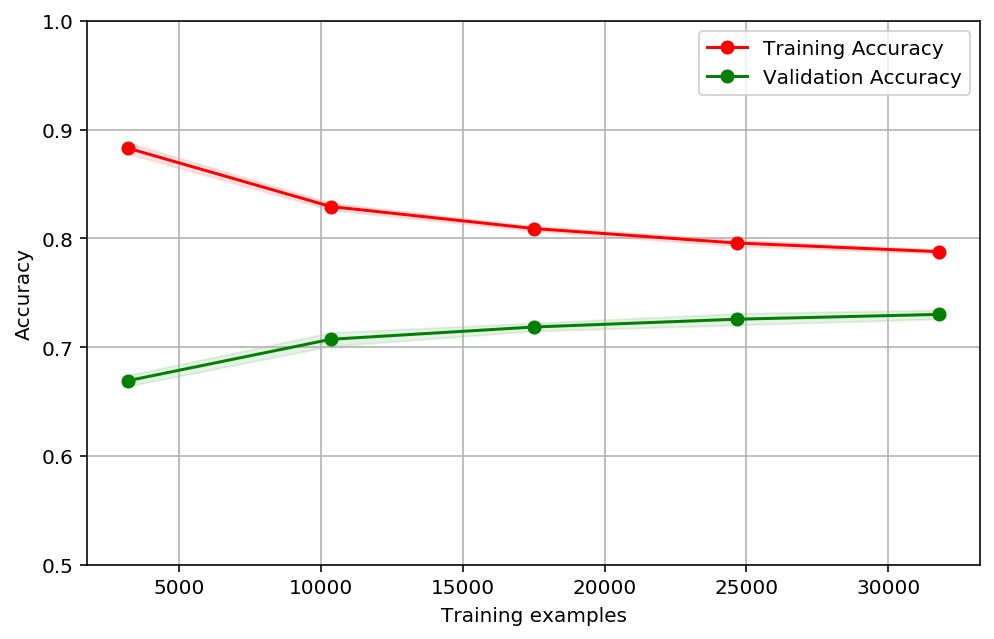

In [0]:
title = "Learning Curves (Naive Bayes)"
cv = StratifiedKFold(n_splits=5, random_state=0)

estimator = model_list[0][1]
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1), cv=cv, n_jobs=4)

plt.show()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


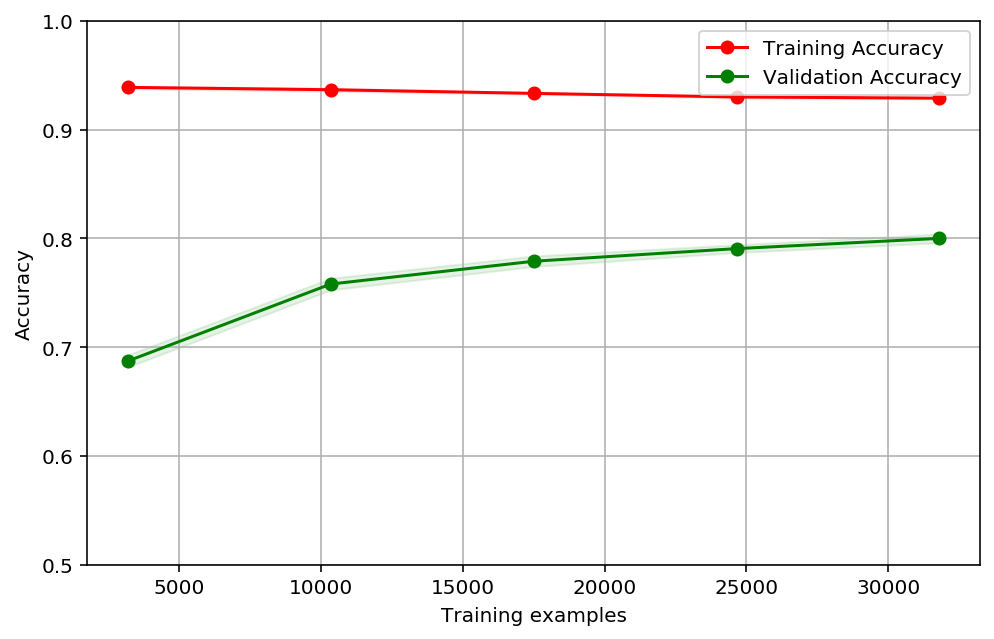

In [0]:
title = "Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = StratifiedKFold(n_splits=5, random_state=0)

estimator = model_list[1][1]
plot_learning_curve(estimator, title, X, y, (0.5, 1), cv=cv, n_jobs=4)

plt.show()

Epoch 1/10
3181/3181 [==============================] - 3s 1ms/step - loss: 2.6611 - acc: 0.2270
Epoch 2/10
3181/3181 [==============================] - 0s 119us/step - loss: 1.8825 - acc: 0.4822
Epoch 3/10
3181/3181 [==============================] - 0s 117us/step - loss: 1.3659 - acc: 0.6218
Epoch 4/10
3181/3181 [==============================] - 0s 125us/step - loss: 1.0646 - acc: 0.7127
Epoch 5/10
3181/3181 [==============================] - 0s 130us/step - loss: 0.8631 - acc: 0.7554
Epoch 6/10
3181/3181 [==============================] - 0s 119us/step - loss: 0.7183 - acc: 0.8023
Epoch 7/10
3181/3181 [==============================] - 0s 123us/step - loss: 0.6029 - acc: 0.8444
Epoch 8/10
3181/3181 [==============================] - 0s 126us/step - loss: 0.5133 - acc: 0.8677
Epoch 9/10
3181/3181 [==============================] - 0s 126us/step - loss: 0.4349 - acc: 0.8969
Epoch 10/10
3181/3181 [==============================] - 0s 62us/step
Epoch 1/10
10338/10338 [=================

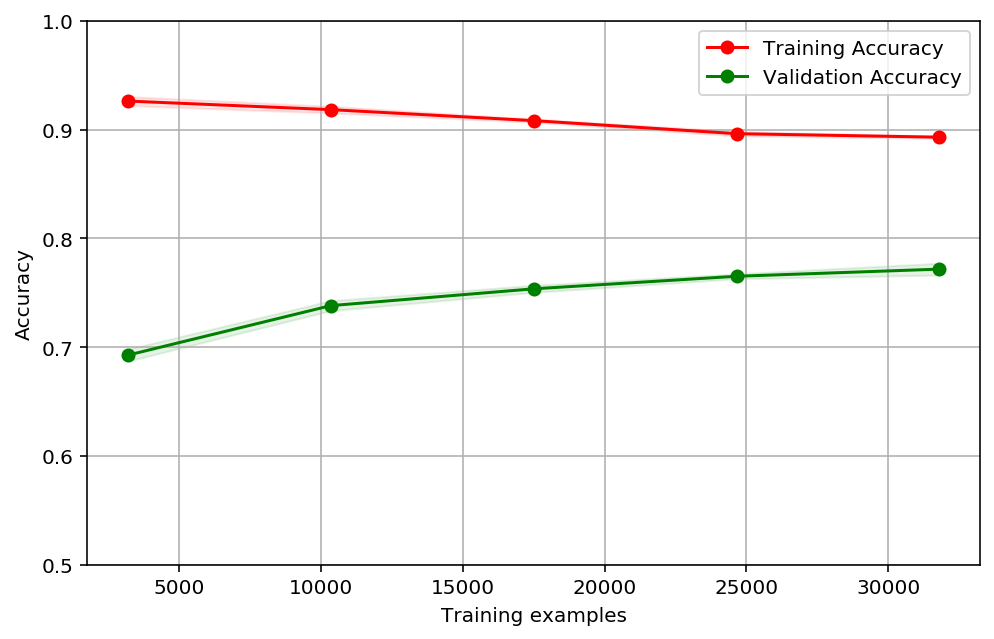

In [0]:
title = "Learning Curves (ANN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = StratifiedKFold(n_splits=5, random_state=0)
estimator = model_list[2][1]
plot_learning_curve(estimator, title, X, y, (0.5, 1), cv=cv)

plt.show()

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
# model = AdaBoostClassifier(n_estimators=100, random_state=0)
# cv = StratifiedKFold(n_splits=5)
# scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
# print(scores)
# print('Train accuracy: {}\nMean: {}'.format(scores['train_score'],scores['train_score'].mean()))
# print('Test accuracy: {}\nMean: {}'.format(scores['test_score'],scores['test_score'].mean()))

In [0]:
# adaboost=AdaBoostClassifier(MultinomialNB(alpha=0.001), n_estimators=100, random_state=0)
# adaboost.fit(Xtrain, ytrain)
# adaboost.score(Xtest,ytest)

In [20]:
dataset_list = [('Original Dataset',X,y),
                ('Oversampled Dataset',Xov,yov),
                ('Undersampled Dataset',Xun,yun)]

for dataset,Xtrain,ytrain in dataset_list:
  print('-------------------------------------------------------------------------------------')
  print('Dataset:',dataset)
  print('-------------------------------------------------------------------------------------')
  for name, model in [('AdaBoost',AdaBoostClassifier(MultinomialNB(alpha=0.001), n_estimators=200, random_state=0))]:
      print('..............................')
      print('Classifier:',name)
      print('..............................')
      starttime = time.monotonic()
      # model.fit(Xtrain,ytrain)
      cv = StratifiedKFold(n_splits=5)
      # model.fit(Xtrain,ytrain)
      # model.score(Xtrain,ytrain)
      scores = cross_validate(model, Xtrain, ytrain, cv=cv, return_train_score=True)
      print('Training time:',(time.monotonic()-starttime)/60, ' minutes')
      print(scores)
      print('Train accuracy: {}\nMean: {}'.format(scores['train_score'],scores['train_score'].mean()))
      print('Test accuracy: {}\nMean: {}'.format(scores['test_score'],scores['test_score'].mean()))
      # if dataset=='Original Dataset':
      #   y_pred = model.predict(Xtest)
      #   adaboost_prf=classification_report(ytest, y_pred, output_dict=True)

-------------------------------------------------------------------------------------
Dataset: Original Dataset
-------------------------------------------------------------------------------------
..............................
Classifier: AdaBoost
..............................
Training time: 5.7508032486500005  minutes
{'fit_time': array([52.95020056, 53.16479492, 52.85460091, 53.14670968, 52.92444468]), 'score_time': array([3.24173665, 3.24319315, 3.21297693, 3.23474741, 3.20200229]), 'test_score': array([0.66327556, 0.6759236 , 0.6690548 , 0.66985285, 0.66037498]), 'train_score': array([0.70369672, 0.7001823 , 0.69404111, 0.70524463, 0.69271373])}
Train accuracy: [0.70369672 0.7001823  0.69404111 0.70524463 0.69271373]
Mean: 0.6991756986493887
Test accuracy: [0.66327556 0.6759236  0.6690548  0.66985285 0.66037498]
Mean: 0.6676963584351612
-------------------------------------------------------------------------------------
Dataset: Oversampled Dataset
-----------------------------

In [0]:
import pickle
with open('/drive/My Drive/adaboost_prf.pkl', 'wb') as f:
     pickle.dump(adaboost_prf, f)